# Лабораторная работа №1

### Вариант 1.6

### Распад разрыва с возникновением двух ударных волн

Цель работы: определить скорости движений фронтов разрыва D$_{0}$ и D$_{3}$

Пусть в начальный момент времени все пространство можно разделить на два однородных полупространства, граница между которыми проходит по плоскости разрыва. Для определенности будем считать, что газодинамические величины справа от этой плоскости имеют индекс 0, а слева - индекс 3

Со временем в результате распада разрыва по правому и левому полупространствам начинают распространятся две ударные волны. Припишем индекс 1 газодинамическим параметрам за правой ударной волной и индекс 2 - за левой.

Запишем три основных закона сохранения массы, количества движения и энергии на левой и правой ударных волнах и условия непрерывности давления и массовой скорости на контактном разрыве.

$\rho_{1}$(U$_{1}$ - D$_{0}$) = $\rho_{0}$(U$_{0}$ - D$_{0}$)

P$_{1}$ + $\rho_{1}$(U$_{1}$ - D$_{0}$)$^{2}$ = P$_{0}$ + $\rho_{0}$(U$_{0}$ - D$_{0}$)$^{2}$

(U$_{1}$ - D$_{0}$)($\rho_{1}$($\varepsilon_{1}$ + $\frac{(U_{1} - D_{0})^{2}}{2}$) + P$_{1}$) = (U$_{0}$ - D$_{0}$)($\rho_{0}$($\varepsilon_{0}$ + $\frac{(U_{0} - D_{0})^{2}}{2}$) + P$_{0}$)

$\rho_{3}$(U$_{3}$ - D$_{3}$) = $\rho_{2}$(U$_{2}$ - D$_{3}$)

P$_{3}$ + $\rho_{3}$(U$_{3}$ - D$_{3}$)$^{2}$ = P$_{2}$ + $\rho_{2}$(U$_{2}$ - D$_{3}$)$^{2}$

(U$_{3}$ - D$_{3}$)($\rho_{3}$($\varepsilon_{3}$ + $\frac{(U_{3} - D_{3})^{2}}{2}$) + P$_{3}$) = (U$_{2}$ - D$_{3}$)($\rho_{2}$($\varepsilon_{2}$ + $\frac{(U_{2} - D_{3})^{2}}{2}$) + P$_{2}$)

P$_{2}$ = P$_{1}$, U$_{2}$ = U$_{1}$

Заданные параметры среды:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import brentq
import seaborn as sns

In [2]:
gamma0 = 5/3
rho0 = 11.37 #г/см3
u0 = -2.28*10**4 #см/с
P0 = 1.17928 * 10**9 #дин/см3
gamma3 = 5/3
rho3 = 7.9 #г/см3
u3 = 2.72*10**4 #см/с
P3 = 3.04*10**9 #дин/см3

Посчитаем некоторые константы, которые упростят вычисления

In [3]:
C0 = np.sqrt(gamma0*P0/rho0) #см/с скорость звука в 0
C3 = np.sqrt(gamma3*P3/rho3) #см/с скорость звука в 3
X = P3/P0
alph0 = (gamma0 + 1)/(gamma0 - 1)
alph3 = (gamma3 + 1)/(gamma3 - 1)

In [4]:
C0, C3, X, alph0, alph3

(13147.785466745574, 25324.8931087668, 2.5778441082694528, 4.0, 4.0)

In [5]:
e3 = 2*C3**2 / (gamma3 * (gamma3 - 1) * (u3 - u0)**2)
e0 = 2*C0**2 / (gamma0 * (gamma0 - 1) * (u3 - u0)**2)

Получим следующее уравнение относительно Y = P1/P0

a$_{0}Y^{6}$ + a$_{1}Y^{5}$ + a$_{2}Y^{4}$ + a$_{3}Y^{3}$ + a$_{4}Y^{2}$ + a$_{5}Y$ + a$_{6}$ = 0

Вычислим коэффициенты a$_{i}$ по формулам из методички

In [6]:
a = np.zeros(7)
a[0] = (alph0 * e3 - alph3 * X * e0)**2
a[1] = 2 * ((alph0 * e3 - alph3 * X * e0) * (e3 * (1 - 2 * alph0 * X) - e0 * X * (X - 2 * alph3)) - alph3 * alph0 * X * (alph0 * e3 + alph3 * X * e0))
a[2] = e3**2 * (6 * alph0**2 * X**2 - 8 * alph0 * X + 1) - 2 * e0 * e3 * X * (alph0 * alph3 * (X**2 + 4 * X + 1) - 2 * (X + 1) * (alph3 + alph0 * X) + X) + e0**2 * X**2 * (6 * alph3**2 - 8 * alph3 * X + X**2) + alph3**2 * alph0**2 * X**2 - 2 * alph0 * X * e3 * (alph0 * X - 2 * alph0 * alph3 * X + 2 * alph3) - 2 * alph3 * X**2 * e0 * (alph3 + 2 * alph0 * X- 2 * alph0 * alph3)
a[3] = -2 * X * (2 * e3**2 * (alph0**2 * X**2 - 3 * alph0 * X + 1) + e0 * e3 * ((alph3 + alph0 * X) * (X**2 + 4 * X + 1) - 2 * alph0 * alph3 * X * (X + 1) - 2 * X * (X + 1)) + 2 * e0**2 * X * (X**2 - 3 * alph3 * X + alph3**2) - alph0 * alph3 * X * (alph0 * X + alph3) + e3 * (alph0**2 * alph3 * X**2 - 2 * X * (2 * alph0 * alph3 + alph0**2 * X) + (2 * alph0 * X + alph3)) + e0 * X * (alph0 * alph3**2 - 2 * alph3 * (alph3 + 2 * alph0 * X) + 2 * alph3 * X + alph0 * X**2))
a[4] = X**2 * (e3**2 * (alph0**2 * X**2 - 8 * alph0 * X + 6) - 2 * e0 * e3 * (alph0 * alph3 * X - 2 * (X + 1) * (alph3 + alph0 * X) + X**2 + 4 * X + 1) + e0**2 * (alph3**2 - 8 * alph3 * X + 6 * X**2) + (alph3**2 + 4 * alph0 * alph3 * X + alph0**2 * X**2) - 2 * e3 * ((alph0**2 * X + 2 * alph0 * alph3) * X - 2 * (2 * alph0 * X + alph3) + 1) - 2 * e0 * (alph3 * (2 * alph0 * X + alph3) - 2 * X * (2 * alph3 + alph0 * X) + X**2))
a[5] = 2 * X**3 * (e3**2 * (alph0 * X - 2) - e0 * e3 * (alph0 * X - 2 + alph3 - 2 * X) + e0**2 * (alph3 - 2 * X) + (alph3 + alph0 * X) - e3 * (2 * alph0 * X + alph3 - 2) - e0 * (2 * alph3 + alph0 * X - 2 * X))
a[6] = X**4 * ((e3 - e0)**2 + 1 - 2 * (e3 + e0))

In [7]:
d = {'$a_0$': [a[0]], '$a_1$': [a[1]], '$a_2$': [a[2]], '$a_3$': [a[3]], '$a_4$': [a[4]], '$a_5$': [a[5]], '$a_6$': [a[6]]}
df = pd.DataFrame(data=d)


df.style.set_caption('Таблица 1. Значения коэффициентов').hide_index()

$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$
0.317770,-266.489806,2426.366039,2865.310514,1101.314077,122.330021,-2.591775


С помощью теоремы Декарта найдем число положительных корней уравнения

In [8]:
# Descartes theorem
k = 0
for i in range(len(a) - 1):
    if (a[i] * a[i + 1] < 0):
        k = k + 1
n = int(k / 2)

number_of_roots = [0 for i in range(n + 1)]

for i in range(n + 1):
    number_of_roots[i] = k - 2 * i
for i in range(len(number_of_roots)):
    number_of_roots[i] = str(number_of_roots[i])
    
print('Согласно теореме Декарта уравнение имеет',' или '.join(number_of_roots), 'положительных корней.')

Согласно теореме Декарта уравнение имеет 3 или 1 положительных корней.


Воспользуемся следствием из основной теоремы алгебры и найдет отрезки локализации корней

In [9]:
A = 0
B = 0

for i in range(0, len(a)):
    if (abs(a[i]) > A and i != 0):
        A = abs(a[i])
    if (abs(a[i]) > B and i != len(a)):
        B = abs(a[i])

n = len(a) - 1

left = abs(a[n]) / (abs(a[n]) + B)
right = 1 + A / a[0]

print('Локализация положительных корней: [','{:f}'.format(left),',','{:f}'.format(right),']')


Локализация положительных корней: [ 0.000904 , 9017.919944 ]


Попробуем найти перемены знака функции P(x). Шаг h = 0.01

In [10]:
f = lambda x: a[0] * x**6 + a[1] * x**5 + a[2] * x**4 + a[3] * x**3 + a[4] * x**2 + a[5] * x + a[6]

d_f = lambda x: 6 * a[0] * x**5 + 5 * a[1] * x**4 + 4 * a[2] * x**3 + 3 * a[3] * x**2 + 2 * a[4] * x + a[5] 
    
dd_f = lambda x: 30 * a[0] * x**4 + 20 * a[1] * x**3 + 12 * a[2] * x**2 + 6 * a[3] * x + 2 * a[4]
    

h = 0.01

for i in range(int((right - left) / h)):
        if (f(left + i * h) * f(left + (i+1) * h) < 0):
               print(left + i * h,left + (i+1) * h )
    

#middle_2 = (left_2 + right_2) / 2

0.010903717952496405 0.020903717952496403
10.310903717952497 10.320903717952497
829.4009037179525 829.4109037179525


Воспользуемся методом Ньютона для нахождения корней на каждом из отрезков локализации. Необходимо убедиться, что метод Ньютона применим на каждом отрезке с заданным начальным приближением.

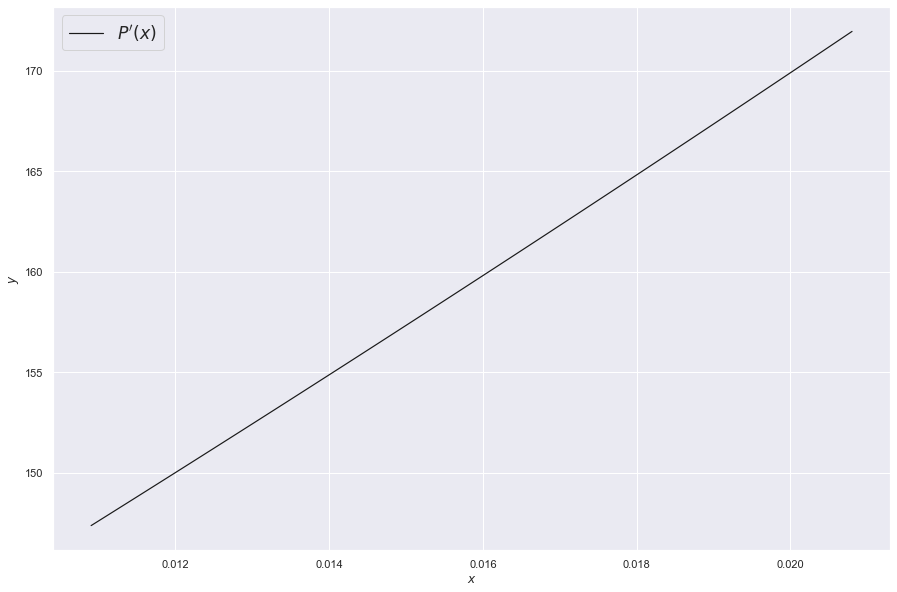

In [11]:
sns.set_theme()
plt.rcParams["figure.figsize"] = (15,10)

p = np.arange(0.010903717952496405, 0.020903717952496403, 0.0001)
q1 = [0 for i in range(len(p))]
q2 = [0 for i in range(len(p))]
for i in range(len(p)):
    q1[i] = d_f(p[i])
    q2[i] = dd_f(p[i])
    
m1_1 = min(q1)
M2_1 = max(q2)

plt.plot(p, q1, lw = 1.2, color = 'k', label="$P'(x)$")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(fontsize='x-large')


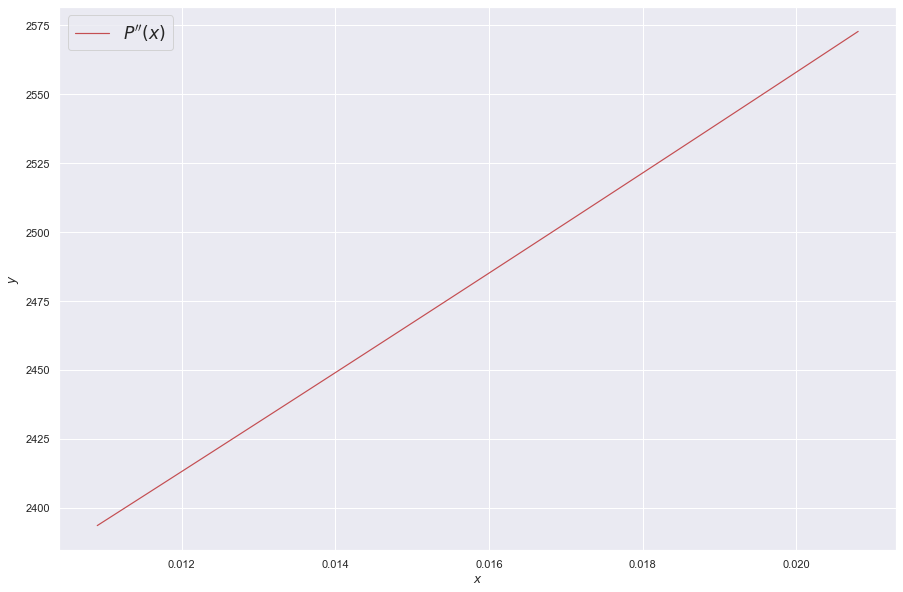

In [12]:
plt.rcParams["figure.figsize"] = (15,10)

plt.plot(p, q2, lw = 1.2, color = 'r', label="$P''(x)$")
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(fontsize='x-large')


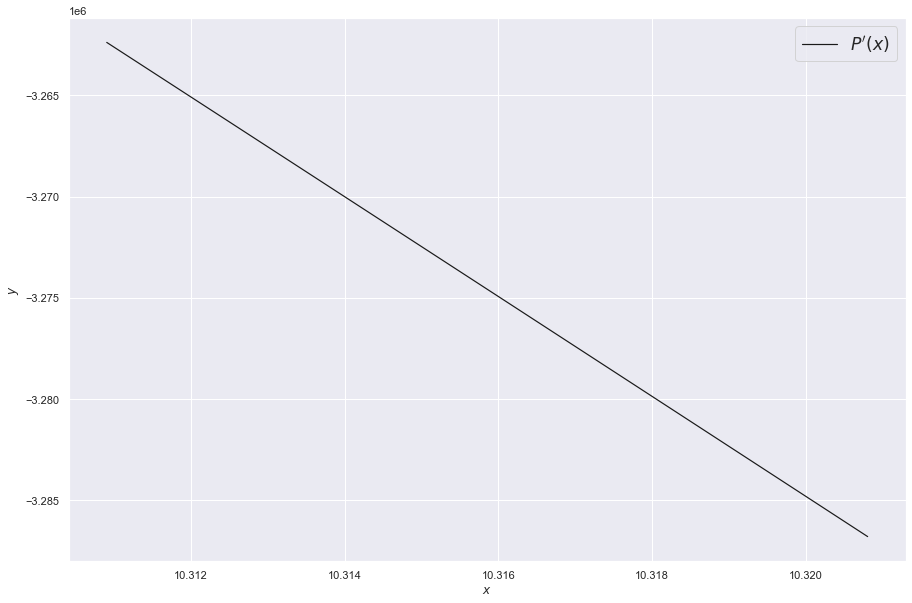

In [13]:
plt.rcParams["figure.figsize"] = (15,10)

p = np.arange(10.310903717952497, 10.320903717952497, 0.0001)
q1 = [0 for i in range(len(p))]
q2 = [0 for i in range(len(p))]
for i in range(len(p)):
    q1[i] = d_f(p[i])
    q2[i] = dd_f(p[i])

m1_2 = min(q1)
M2_2 = max(q2)    

plt.plot(p, q1, lw = 1.2, color = 'k', label="$P'(x)$")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(fontsize='x-large')

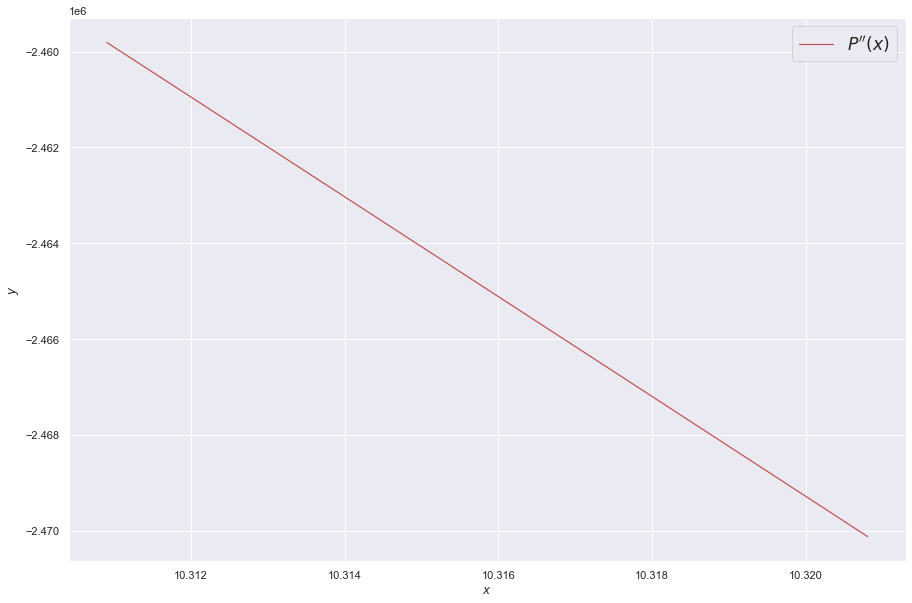

In [14]:
plt.rcParams["figure.figsize"] = (15,10)

plt.plot(p, q2, lw = 1.2, color = 'r', label="$P''(x)$")
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(fontsize='x-large')


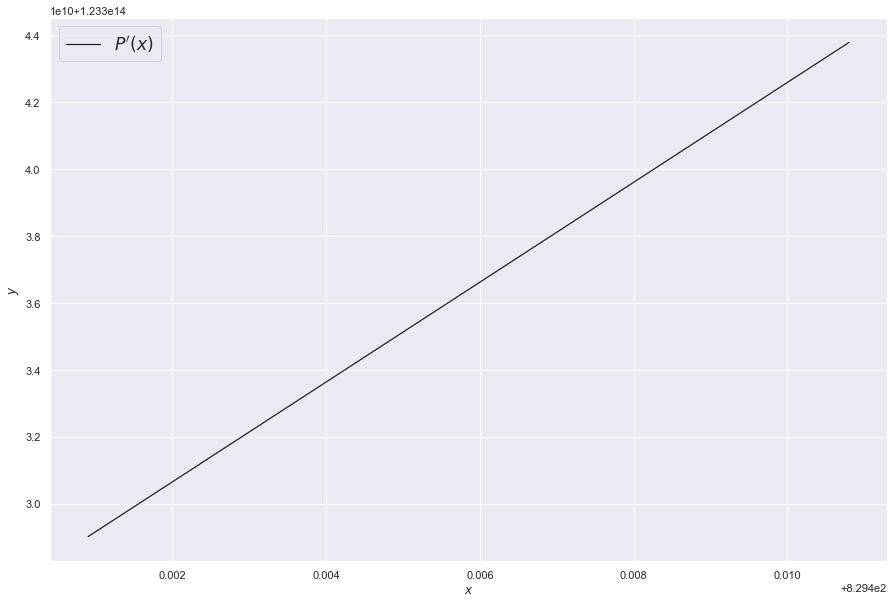

In [15]:
plt.rcParams["figure.figsize"] = (15,10)

p = np.arange(829.4009037179525, 829.4109037179525, 0.0001)
q1 = [0 for i in range(len(p))]
q2 = [0 for i in range(len(p))]
for i in range(len(p)):
    q1[i] = d_f(p[i])
    q2[i] = dd_f(p[i])

m1_3 = min(q1)
M2_3 = max(q2)
    
plt.plot(p, q1, lw = 1.2, color = 'k', label="$P'(x)$")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(fontsize='x-large')

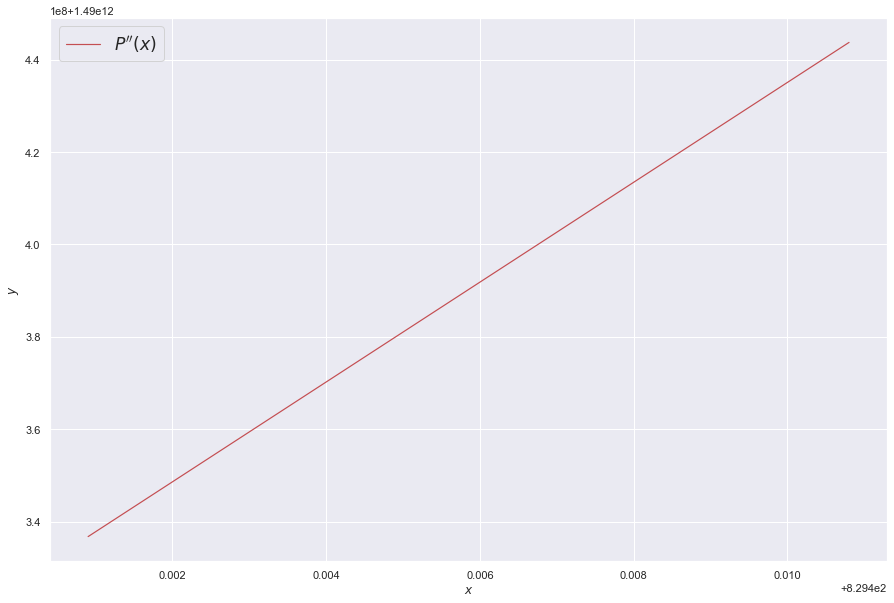

In [16]:
plt.rcParams["figure.figsize"] = (15,10)

plt.plot(p, q2, lw = 1.2, color = 'r', label="$P''(x)$")
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(fontsize='x-large')

Из графиков видно, что функции знакопостоянны и непрерывны на отрезках локализации. Проверим условие P'(x0)P''(x0) > 0 для точек, посчитанных ниже

In [17]:
x01 = 0.020903717952496403
x02 = 10.310903717952497/2 + 10.320903717952497/2
x03 = (829.4009037179525  + 829.4109037179525)/2

In [18]:
f(x01)*dd_f(x01)

1218.460869518035

In [19]:
f(x02)*dd_f(x02)

19091995614.649467

In [20]:
f(x03)*dd_f(x03)

2.6710910766638257e+23

Таким образом условия сходимости метода Ньютона выполнены. Найдем корни

In [21]:
def newton(f, d_f, x_0, m1, M2, epsilon, max_iter):
    x_n_ar = []
    x_n_ar.append(x_0)
    x_n = x_0
    f_x_n = f(x_n)
    d_f_x_n = d_f(x_n)
    
    for n in range(0, max_iter): 
        x_n = x_n - f_x_n/d_f_x_n
        f_x_n = f(x_n)
        d_f_x_n = d_f(x_n)
        x_n_ar.append(x_n)
        t = M2 * abs(x_n_ar[n] - x_n_ar[n+1])**2/(2 * m1)
        if t < epsilon:
            print('Решение найдено после', n, 'итераций.')
            return x_n
        if d_f_x_n == 0:
            print('Нулевая производная. Решение не найдено')
            return -1
    print('Итерация', n, x_n)
    print('Превышено максимальное число итераций. Решение не найдено.')
    return -1

approx1 = newton(f, d_f, x01, m1_1, M2_1, 1e-10, 2000)
if (approx1 != -1):
    print(approx1, f(approx1))

approx2 = newton(f, d_f,x02, m1_2, M2_2, 1e-10, 2000)
if (approx2 != -1):
    print(approx2, f(approx2))

approx3 = newton(f, d_f, x03, m1_3, M2_3, 1e-10, 2000)
if (approx3 != -1):
    print(approx3, f(approx3))

Решение найдено после 2 итераций.
0.018097270481346257 8.610889778992714e-13
Решение найдено после 1 итераций.
10.313536449372458 -5.470654922401508e-06
Решение найдено после 1 итераций.
829.4044506001925 0.28812699426071164


Выразим неизвестные параметры для каждого корня

In [22]:
P1_1 = P0 * approx1
P1_2 = P0 * approx2
P1_3 = P0 * approx3

u1_1_1 = u0 - (P1_1 - P0)/(rho0 * C0 * np.sqrt(((gamma0 - 1) + (gamma0 + 1)* P1_1/P0)/(2 * gamma0)))
u1_1_2 = u0 + (P1_1 - P0)/(rho0 * C0 * np.sqrt(((gamma0 - 1) + (gamma0 + 1)* P1_1/P0)/(2 * gamma0)))

u1_2_1 = u0 - (P1_2 - P0)/(rho0 * C0 * np.sqrt(((gamma0 - 1) + (gamma0 + 1)* P1_2/P0)/(2 * gamma0)))
u1_2_2 = u0 + (P1_2 - P0)/(rho0 * C0 * np.sqrt(((gamma0 - 1) + (gamma0 + 1)* P1_2/P0)/(2 * gamma0)))

u1_3_1 = u0 - (P1_3 - P0)/(rho0 * C0 * np.sqrt(((gamma0 - 1) + (gamma0 + 1)* P1_3/P0)/(2 * gamma0)))
u1_3_2 = u0 + (P1_3 - P0)/(rho0 * C0 * np.sqrt(((gamma0 - 1) + (gamma0 + 1)* P1_3/P0)/(2 * gamma0)))

In [23]:
P1_1, P1_2, P1_3

(21341749.133242015, 12162547264.015953, 978100080503.795)

In [24]:
u1_1_1, u1_1_2, u1_2_1, u1_2_2, u1_3_1, u1_3_2,    

(-6074.421921273832,
 -39525.57807872616,
 -48073.69946583854,
 2473.699465838541,
 -276460.39580959274,
 230860.39580959277)

Возьмем положительные значения U1

In [25]:
D0_1 = (P0 - P1_1 - rho0 * u1_1_1 * u0 + rho0 * u0**2)/(rho0 * (u0 - u1_1_1))
D0_2 = (P0 - P1_2 - rho0 * u1_2_2 * u0 + rho0 * u0**2)/(rho0 * (u0 - u1_2_2))
D0_3 = (P0 - P1_3 - rho0 * u1_3_2 * u0 + rho0 * u0**2)/(rho0 * (u0 - u1_3_2))

In [26]:
D0_1, D0_2, D0_3

(-28888.969501527303, 15421.019762528496, 315924.2003540022)

In [27]:
rho1_1 = rho0 * (u0 - D0_1) / (u1_1_1 - D0_1)
rho1_2 = rho0 * (u0 - D0_2) / (u1_2_2 - D0_2)
rho1_3 = rho0 * (u0 - D0_3) / (u1_3_2 - D0_3)

In [28]:
rho1_1, rho1_2, rho1_3

(3.0345367572525106, 33.564705648863075, 45.2753574643414)

In [29]:
D3_1 = (P3 - P1_1 - rho3 * u1_1_1 * u3 + rho0 * u3**2)/(rho3 * (u3 - u1_1_1))
D3_2 = (P3 - P1_2 - rho3 * u1_2_2 * u3 + rho0 * u3**2)/(rho3 * (u3 - u1_2_2))
D3_3 = (P3 - P1_3 - rho3 * u1_3_2 * u3 + rho0 * u3**2)/(rho3 * (u3 - u1_3_2))

In [30]:
D3_1, D3_2, D3_3

(48449.84581928043, -6358.8059718402965, 631639.3582782638)

In [31]:
rho2_1 = rho3 * (u3 - D3_1) / (u1_1_1 - D3_1)
rho2_2 = rho3 * (u3 - D3_2) / (u1_2_2 - D3_2)
rho2_3 = rho3 * (u3 - D3_3) / (u1_3_2 - D3_3)

In [32]:
rho2_1, rho2_2 , rho2_3

(3.0788819167846175, 30.01578306949901, 11.914475003840932)

# Вывод

В данной работе удалось посчитать скорости волн D$_{0}$ и D$_{3}$, а также многие другие параметры

In [33]:
d = {'Параметр': ['Корень $x$', 'Давление $P_1$, дин/см$^2$', 'Плотность $\\rho_1$, г/см$^3$', 'Плотность $\\rho_2$, г/см$^3$', 'Массовая скорость $U_1$, см/c', 'Скорость ударной волны $D_0$, см/c', 'Скорость ударной волны $D_3$, см/c'], 
     '1': ["{:5E}".format(approx1), "{:5E}".format(P1_1), "{:5E}".format(rho1_1), "{:5E}".format(rho2_1), "{:5E}".format(u1_1_1), "{:5E}".format(D0_1), "{:5E}".format(D3_1)],
     '2': ["{:5E}".format(approx2), "{:5E}".format(P1_2), "{:5E}".format(rho1_2), "{:5E}".format(rho2_2), "{:5E}".format(u1_2_2), "{:5E}".format(D0_2), "{:5E}".format(D3_2)],
     '3': ["{:5E}".format(approx3), "{:5E}".format(P1_3), "{:5E}".format(rho1_3), "{:5E}".format(rho2_3), "{:5E}".format(u1_3_2), "{:5E}".format(D0_3), "{:5E}".format(D3_3)],}
df = pd.DataFrame(data=d)


df.style.set_caption('Таблица 2. Значения газодинамических параметров').hide_index()

Параметр,1,2,3
Корень $x$,1.809727E-02,1.031354E+01,8.294045E+02
"Давление $P_1$, дин/см$^2$",2.134175E+07,1.216255E+10,9.781001E+11
"Плотность $\rho_1$, г/см$^3$",3.034537E+00,3.356471E+01,4.527536E+01
"Плотность $\rho_2$, г/см$^3$",3.078882E+00,3.001578E+01,1.191448E+01
"Массовая скорость $U_1$, см/c",-6.074422E+03,2.473699E+03,2.308604E+05
"Скорость ударной волны $D_0$, см/c",-2.888897E+04,1.542102E+04,3.159242E+05
"Скорость ударной волны $D_3$, см/c",4.844985E+04,-6.358806E+03,6.316394E+05
